# **Analisa untuk Memprediksi Karyawan yang Keluar (Churn)**

### TOPIK : Penggunaan ML untuk memprediksi karyawan yang churn
Problem Overview :

Dalam prediksi churn karyawan, melibatkan pemahaman yang mendalam tentang faktor-faktor yang mempengaruhi keputusan karyawan 
untuk meninggalkan perusahaan. Beberapa hal yang perlu dipertimbangkan meliputi:

1. Identifikasi Faktor Churn: Masalah utama adalah mengidentifikasi faktor-faktor yang menyebabka churn.
2. Data yang Tidak Seimbang: Biasanya, jumlah pelanggan atau karyawan yang churn (keluar) jauh lebih sedikit daripada yang tetap
   tinggal (aktif). Hal ini menghasilkan masalah ketidakseimbangan kelas yang dapat mempengaruhi kinerja model prediksi. Kondisi
   ini memerlukan pemrosesan data yang tepat.
3. Pemilihan Fitur yang Tepat: Penting untuk memilih fitur-fitur yang paling relevan dan bermakna dalam memprediksi churn.
4. Model yang Tidak Optimal: Menemukan model prediksi churn yang optimal memerlukan pemilihan dan penyesuaian model yang tepat.
5. Evaluasi Model: Evaluasi model untuk prediksi churn juga merupakan bagian penting dari proses.Model harus dievaluasi menggunakan
   metrik yang relevan seperti akurasi, presisi, recall, dan F1-Score untuk memastikan bahwa model dapat memprediksi churn dengan
   baik dan mampu mengidentifikasi sebanyak mungkin kasus churn yang sebenarnya.
6. Implementasi Solusi: Setelah model prediksi churn dibangun, langkah selanjutnya adalah menerapkannya dalam praktek bisnis. 
   Ini melibatkan integrasi model ke dalam sistem informasi perusahaan dan pengembangan strategi tindak lanjut yang efektif 
   berdasarkan hasil prediksi churn.

## **Data Preprocessing**

https://www.kaggle.com/datasets/ninopadilla13/employee-churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns",None)
df = pd.read_csv('employee_churn.csv')

In [3]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


Pengamatan:

Data terdiri dari 10 kolom dengan 14249 baris.
Semua kolom memiliki Missing values (kecuali kolom avg_monthly_hrs,n_projects,salary dan status), dan nantinya akan di drop.
Semua tipe tampak OK (sesuai), mengingat nama kolom yang sesuai di temp

In [5]:
# number of missing values per column
df.isna().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [6]:
# percentage version
df.isna().sum() * 100 / len(df)

avg_monthly_hrs       0.000000
department            4.975788
filed_complaint      85.556881
last_evaluation      10.751632
n_projects            0.000000
recently_promoted    97.894589
salary                0.000000
satisfaction          1.270265
status                0.000000
tenure                1.270265
dtype: float64

In [7]:
# Portion missing values considering all columns
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

99.58593585514774

Berdasarkan jumlah persentase missing value yang besar, maka tidak ada kolom yang di drop

In [8]:
unique_values = df['department'].unique()
unique_values

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [9]:
df = df.dropna(subset=['tenure'])


df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)
df.last_evaluation.fillna(0, inplace=True)

df['department'].fillna('Missing',inplace=True)

df.department.replace('information_technology', 'IT', inplace=True)

In [10]:
# Transformed Dataset
df.sample(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,last_evaluation_missing
12342,158,engineering,0.0,0.573089,4,0.0,medium,0.874101,Employed,3.0,0
3521,222,finance,0.0,0.735437,4,0.0,medium,0.744941,Employed,2.0,0
10633,245,sales,0.0,0.795245,4,0.0,medium,0.792704,Left,5.0,0
735,248,sales,0.0,0.760460,5,0.0,medium,0.521644,Employed,3.0,0
14021,132,sales,0.0,0.000000,3,0.0,low,0.899856,Employed,2.0,1
4953,254,management,0.0,0.785632,4,0.0,high,0.499558,Employed,10.0,0
12173,135,engineering,0.0,0.548046,2,0.0,high,0.895321,Employed,3.0,0
3273,152,sales,0.0,0.000000,3,0.0,medium,0.522890,Employed,3.0,1
12351,152,IT,0.0,0.521294,2,0.0,low,0.332210,Left,3.0,0
884,172,product,0.0,0.709603,4,0.0,medium,0.903026,Employed,3.0,0


In [11]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

Tidak ada lagi data yang missing

In [12]:
# drop duplicated rows
df = df.drop_duplicates()

In [13]:
# sanity check
df.duplicated().sum()

0

Tidak ada duplikat

## **Data Encoder**

In [14]:
# Transforming Categorical Data (One Hot Encoding)

OHE_Cols = ['salary']

for col in OHE_Cols:
 data1 = pd.get_dummies(df[[col]],dtype=int) 
 data2 = df.drop(columns=col)

   
df = pd.concat([data1, data2], axis = 1)

In [15]:
# Transformed Dataset
df.sample(10)

,salary_high,salary_low,salary_medium,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing
7619,1,0,0,262,sales,0.0,0.857313,6,0.0,0.433408,Employed,6.0,0
1100,0,0,1,134,IT,0.0,0.746617,3,0.0,0.630785,Employed,3.0,0
4902,0,0,1,167,admin,0.0,0.629343,3,0.0,0.863032,Employed,4.0,0
10539,0,0,1,173,finance,0.0,0.567902,4,0.0,0.202295,Employed,5.0,0
1658,0,0,1,241,support,1.0,0.000000,5,0.0,0.628705,Employed,3.0,1
11617,0,0,1,134,sales,0.0,0.642093,5,0.0,0.770907,Employed,2.0,0
10569,0,1,0,110,sales,1.0,0.689520,5,0.0,0.281827,Employed,5.0,0
1445,0,0,1,271,procurement,0.0,0.926858,5,1.0,0.861973,Employed,2.0,0
6313,0,0,1,271,sales,0.0,0.732601,3,0.0,0.640905,Employed,2.0,0
2771,0,0,1,245,finance,0.0,0.695945,3,0.0,0.918665,Employed,10.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14068 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary_high              14068 non-null  int32  
 1   salary_low               14068 non-null  int32  
 2   salary_medium            14068 non-null  int32  
 3   avg_monthly_hrs          14068 non-null  int64  
 4   department               14068 non-null  object 
 5   filed_complaint          14068 non-null  float64
 6   last_evaluation          14068 non-null  float64
 7   n_projects               14068 non-null  int64  
 8   recently_promoted        14068 non-null  float64
 9   satisfaction             14068 non-null  float64
 10  status                   14068 non-null  object 
 11  tenure                   14068 non-null  float64
 12  last_evaluation_missing  14068 non-null  int32  
dtypes: float64(5), int32(4), int64(2), object(2)
memory usage: 1.3+ MB


Setelah di cleaning (drop & fill), terdapat 13 kolom dengan 14068 baris. Terdapat 4 model tipe data, yaitu float64(5 bh),
int32(4 bh), int64(2 bh), object(2 bh)

In [17]:
df.describe()

,salary_high,salary_low,salary_medium,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,0.081177,0.488413,0.430409,201.083736,0.143944,0.649479,3.801038,0.021325,0.621295,3.497228,0.096034
std,0.273117,0.499884,0.495151,49.959962,0.351045,0.268123,1.236058,0.144470,0.250469,1.460917,0.294648
min,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,2.000000,0.000000
25%,0.000000,0.000000,0.000000,156.000000,0.000000,0.525727,3.000000,0.000000,0.450390,3.000000,0.000000
50%,0.000000,0.000000,0.000000,200.000000,0.000000,0.688023,4.000000,0.000000,0.652527,3.000000,0.000000
75%,0.000000,1.000000,1.000000,245.000000,0.000000,0.858129,5.000000,0.000000,0.824951,4.000000,0.000000
max,1.000000,1.000000,1.000000,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,1.000000


## **Statistical Summary**

In [18]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['department','status']

numericals = ['salary_high','salary_low','salary_medium','avg_monthly_hrs','filed_complaint','last_evaluation','n_projects','recently_promoted',
            'satisfaction','tenure','last_evaluation_missing']

In [19]:
# numerical statistical sumary
df[numericals].describe()

,salary_high,salary_low,salary_medium,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,0.081177,0.488413,0.430409,201.083736,0.143944,0.649479,3.801038,0.021325,0.621295,3.497228,0.096034
std,0.273117,0.499884,0.495151,49.959962,0.351045,0.268123,1.236058,0.144470,0.250469,1.460917,0.294648
min,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,2.000000,0.000000
25%,0.000000,0.000000,0.000000,156.000000,0.000000,0.525727,3.000000,0.000000,0.450390,3.000000,0.000000
50%,0.000000,0.000000,0.000000,200.000000,0.000000,0.688023,4.000000,0.000000,0.652527,3.000000,0.000000
75%,0.000000,1.000000,1.000000,245.000000,0.000000,0.858129,5.000000,0.000000,0.824951,4.000000,0.000000
max,1.000000,1.000000,1.000000,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,1.000000


Pengamatan:

Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom. Kolom 'avg_monthly_hrs','filed_complaint','n_projects',
'tenure' dan 'last_evaluation_missing' adalah nilai-nilai diskrit dengan nilai unik yang banyak,sehingga perlu dianalisa 
kesimetrisannya. Berarti ~ 50% (Median) di kolom 'avg_monthly_hrs', 'last_evaluation','satisfaction' dan
'last_evaluation_missing',menunjukkan distribusi yang agak simetris, nanti akan dihilangkan.

In [20]:
# value counts discrete columns
cols = ['salary_high','salary_low','salary_medium','avg_monthly_hrs','filed_complaint', 'n_projects','tenure','last_evaluation_missing']
for col in cols:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of salary_high column
salary_high
0    12926
1     1142
Name: count, dtype: int64 

Value counts of salary_low column
salary_low
0    7197
1    6871
Name: count, dtype: int64 

Value counts of salary_medium column
salary_medium
0    8013
1    6055
Name: count, dtype: int64 

Value counts of avg_monthly_hrs column
avg_monthly_hrs
135    144
151    142
156    142
149    140
145    125
      ... 
297      7
299      6
96       6
303      6
288      6
Name: count, Length: 215, dtype: int64 

Value counts of filed_complaint column
filed_complaint
0.0    12043
1.0     2025
Name: count, dtype: int64 

Value counts of n_projects column
n_projects
4    4070
3    3796
5    2590
2    2265
6    1104
7     243
Name: count, dtype: int64 

Value counts of tenure column
tenure
3.0     6048
2.0     3046
4.0     2400
5.0     1373
6.0      664
10.0     200
7.0      182
8.0      155
Name: count, dtype: int64 

Value counts of last_evaluation_missing column
last_evaluation_missing
0    12717
1

In [21]:
# describe method on categorical data
df[categoricals].describe()

,department,status
count,14068,14068
unique,11,2
top,sales,Employed
freq,3923,10701


Pengamatan:

Kolom departemen memiliki 11 nilai unik, yaitu ada 11 unit departement sebagian besar karyawan terdiri dari sales yaitu 3923 orang.
Kolom status memiliki 2 nilai unik yaitu Employed (karyawan loyal) sebanyak 10701 orang dan Left

In [22]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of department column
department
sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
Missing         709
management      595
admin           176
procurement     174
Name: count, dtype: int64 

Value counts of status column
status
Employed    10701
Left         3367
Name: count, dtype: int64 



Dari perhitungan terlihat karyawan yang 14068 orang, terbanyak dari divisi sales sebesar 3923 orang, dan terkecil dari divisi 
procurement 174 orang.Yang bergaji tinggi 1142 orang, gaji medium 6871 orang, gaji rendah 6055 orang.
Jumlah keseluruhan karyawan adalah 14068 dengan komposisi karyawan yang loyal 10701 orang dan yang keluar 3367 orang.

## **Univariate Analysis**

### **Boxplot to detect outliers**

C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\419479426.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\i

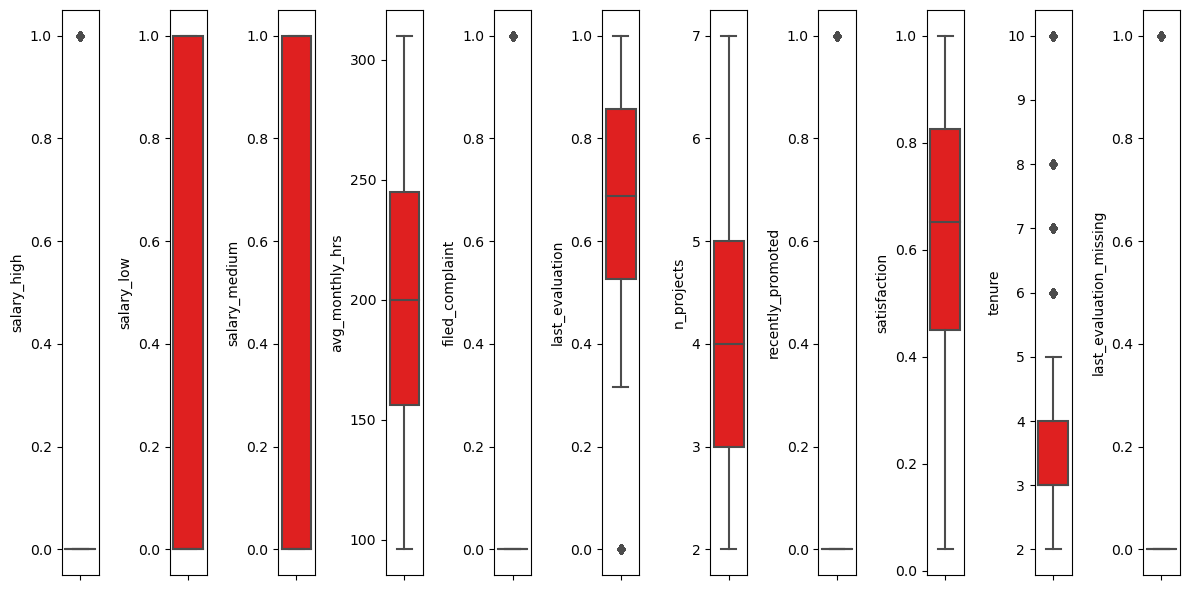

In [23]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Dari Boxplot terlihat adanya outlier di salary_high,last_evaluation, recently_promoted,tenure dan last_evaluation_missing,
namun bisa diabaikan karena tidak terlalu berpengaruh.

In [24]:
# check the outlier full profile
outlier = df['tenure'].min()

df[df['tenure'] == outlier]

,salary_high,salary_low,salary_medium,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing
1,0,1,0,232,support,0.0,0.000000,3,0.0,0.834544,Employed,2.0,1
3,0,1,0,206,sales,0.0,0.575688,4,0.0,0.424764,Employed,2.0,0
9,0,0,1,269,support,0.0,0.909364,5,0.0,0.994037,Employed,2.0,0
18,0,1,0,276,product,0.0,0.570039,4,0.0,0.382260,Employed,2.0,0
34,0,0,1,234,IT,1.0,0.861565,4,0.0,0.627200,Employed,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14229,0,0,1,181,IT,0.0,0.641048,3,0.0,1.000000,Employed,2.0,0
14235,0,1,0,151,IT,0.0,0.000000,4,0.0,0.774994,Employed,2.0,1
14237,1,0,0,181,engineering,0.0,0.641214,3,0.0,0.617925,Employed,2.0,0
14243,0,1,0,272,engineering,0.0,0.815504,4,0.0,0.693387,Employed,2.0,0


Pengamatan:

Ada outlier di kolom tenure, dibatas maximalnya (nilai max = 10), karena ada karyawan yang bekerja selama 10 tahun. Namun nilainya masih masuk akal (TIDAK terlalu ekstrim),
sehingga tidak perlu penanganan secara khusus ke seluruh DataFrame.

## **KDE plot for knowing the distribution form**

C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_12084\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\i

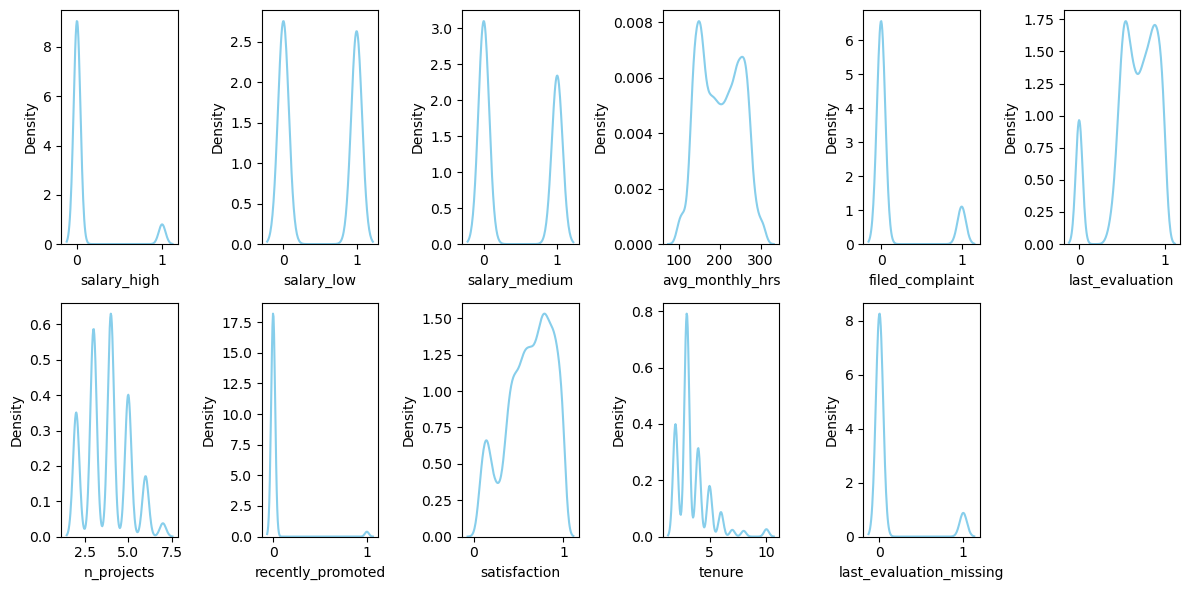

In [25]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Dari KDE diatas dapat diketahui sebaran data satisfaction dan status dapat diolah sebagai permodelan, dimana skew untuk:

1. avg_monthly_hrs sebarannya adalah normal skew
2. filed_complaint, sebaran distribusi '0' (tdk komplain) sangat tinggi dibanding distribusi'1'(komplain)
3. last_evaluation, sebaran distribusi ke arah skew negatif, dengan ekor /melandai ke kiri
4. n_project, sebaran distribusi ke arah skew positif, dengan ekor /melandai ke kanan
5. recently_promoted,sebaran distribusi '0' (tdk promosi) sangat tinggi dibanding distribusi'1'(promosi)
6. satisfaction,sebarannya adalah negatif skew
7. tenure,sebaran distribusi ke arah skew positif, dengan ekor /melandai ke kanan
8. last_evaluation_missing,sebarannya adalah normal skew
9. salary_high, sebarannya adalah normal skew
10.salary_low, sebarannya adalah normal skew
11.salary_medium, sebarannya adalah normal skew

## **Bivariate Analysis**

In [26]:
# remember the dataset
df.head()

,salary_high,salary_low,salary_medium,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing
0,0,1,0,221,engineering,0.0,0.932868,4,0.0,0.829896,Left,5.0,0
1,0,1,0,232,support,0.0,0.000000,3,0.0,0.834544,Employed,2.0,1
2,0,0,1,184,sales,0.0,0.788830,3,0.0,0.834988,Employed,3.0,0
3,0,1,0,206,sales,0.0,0.575688,4,0.0,0.424764,Employed,2.0,0
4,0,1,0,249,sales,0.0,0.845217,3,0.0,0.779043,Employed,3.0,0


<Axes: xlabel='last_evaluation_missing', ylabel='count'>

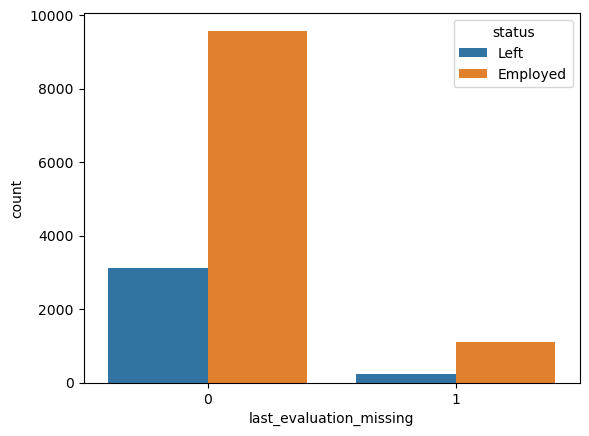

In [27]:
#last_evaluation_missing affect status?
sns.countplot(data=df,
            x='last_evaluation_missing',
            hue='status'
            )         

status = 1 berarti karyawan keluar (churn), dan status = 0 berarti sebaliknya
Dapat dikatakan bahwa pada last_evaluation_missing yang banyak jumlahnya adalah yang 0 (tidak churn).

## **Heatmap**

<Axes: >

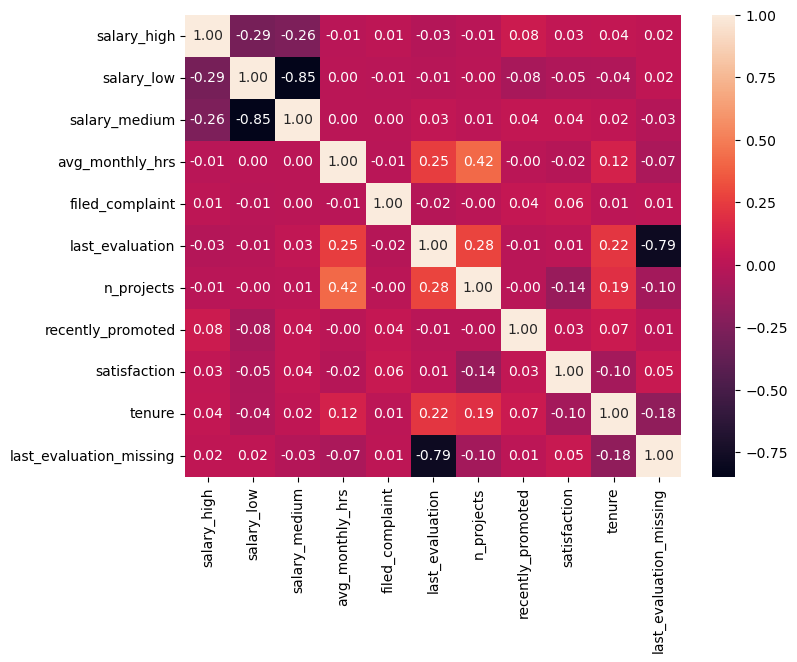

In [28]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Dari heatmap diatas dapat dilihat bahwa warna terang menunjukkan nilai - nilai yang berkolerasi dari satu kolom ke kolom lainnya.
dengan kata lain kolom 'avg_monthly_hrs','filed_complaint','last_evaluation', 'n_projects','recently_promoted', 'satisfaction',
'status','tenure','last_evaluation_missing' tidak terlalu memiliki korelasi yang kuat karena < 0.5. Tapi untuk kolom salary_low dan salary_medium terdapat korelasi yang kuat yaitu - 0.85,
namun agar tidak kehilangan informasi maka kolom yang berkorelasi tinggi tidak perlu untuk dihilangkan.

## **ViolinPlot**

In [29]:
import seaborn as sb

<Axes: xlabel='n_projects', ylabel='avg_monthly_hrs'>

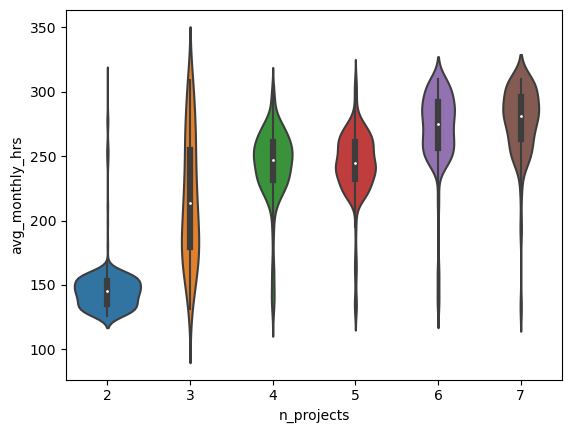

In [30]:
sb.violinplot(y='avg_monthly_hrs', x='n_projects', data=df[df.status=='Left'])

violin plot yang menampilkan distribusi 'avg_monthly_hrs' untuk setiap nilai 'n_projects' di status karyawan yang churn /Left.
Terlihat pada project 2 :skewnya positif, project 3 : skew normal, project 4,5,6,7 : skew negatif. rentang jam kerja terbanyak
saat project ke 3

<Axes: xlabel='tenure', ylabel='avg_monthly_hrs'>

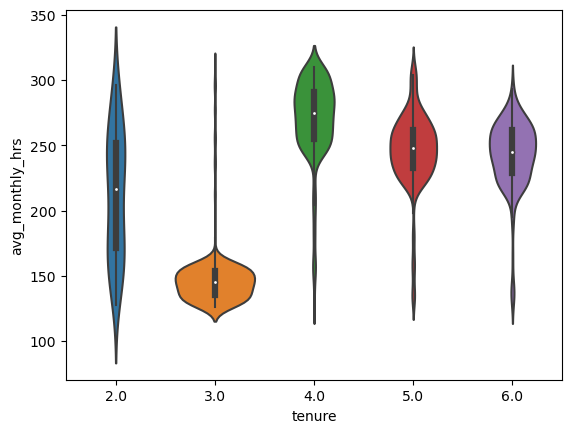

In [31]:
sb.violinplot(y='avg_monthly_hrs', x='tenure', data=df[df.status=='Left'])

menampilkan distribusi 'avg_monthly_hrs' untuk setiap nilai 'tenure' di status karyawan yang churn /Left. Terlihat 
rata-rata tenure,skewnya normal hanya dimasa kerja 2 tahun. sedang di tahun ke 3 skewnya positif, ditahun ke 4, 5 dan 6 tahun masa
kerja skewnya negatif.

<Axes: xlabel='tenure', ylabel='n_projects'>

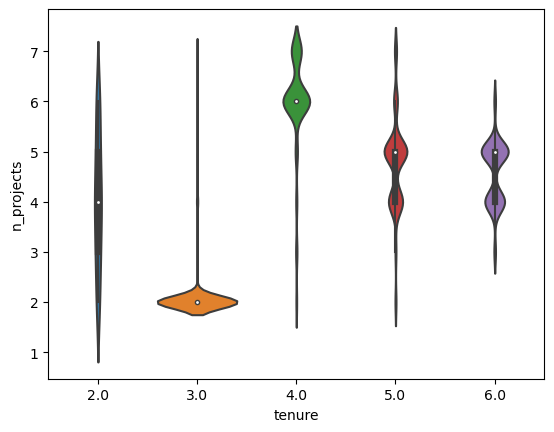

In [32]:
sb.violinplot(y='n_projects', x='tenure', data=df[df.status=='Left'])

menampilkan distribusi 'n_projects' untuk setiap nilai 'tenure' di status karyawan yang churn /Left. Terlihat  ditenure 3,skewnya positif dan di tenure 2,5,6 tahun skewnya normal
dan di tenure 4 skewnya negatif.

<Axes: xlabel='tenure', ylabel='last_evaluation'>

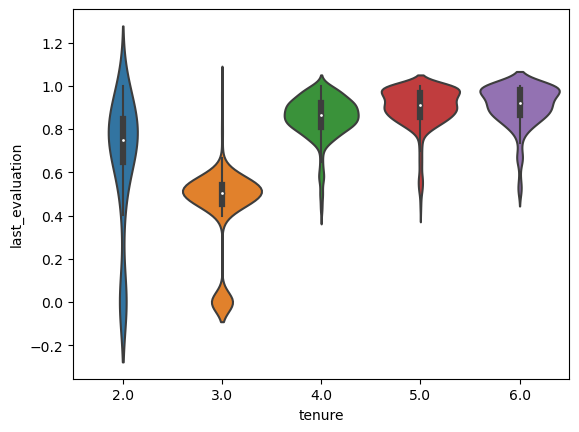

In [33]:
sb.violinplot(y='last_evaluation', x='tenure', data=df[df.status=='Left'])

menampilkan distribusi 'last_evaluation' untuk setiap nilai 'tenure' di status karyawan yang churn /Left. Terlihat rata-rata tenure,skewnya negatif.

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


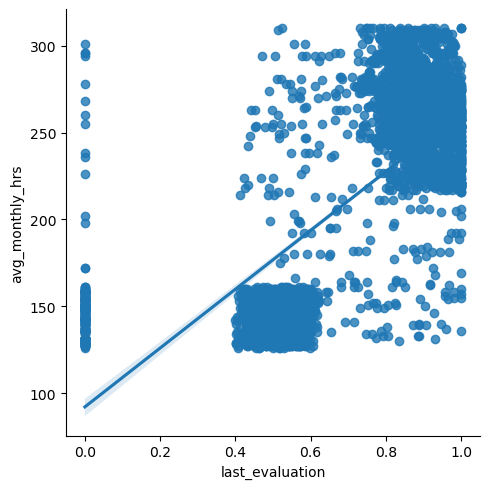

In [34]:
sb.lmplot(y='avg_monthly_hrs', x='last_evaluation', data=df[df.status=='Left'])

memperlihatkan garis regresi linier yang menunjukkan kecenderungan hubungan antara variabel 'avg_monthly_hrs' dan 'last_evaluation'. Hubungan variabel yang ditampilkan untuk data di kolom 'status'.

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


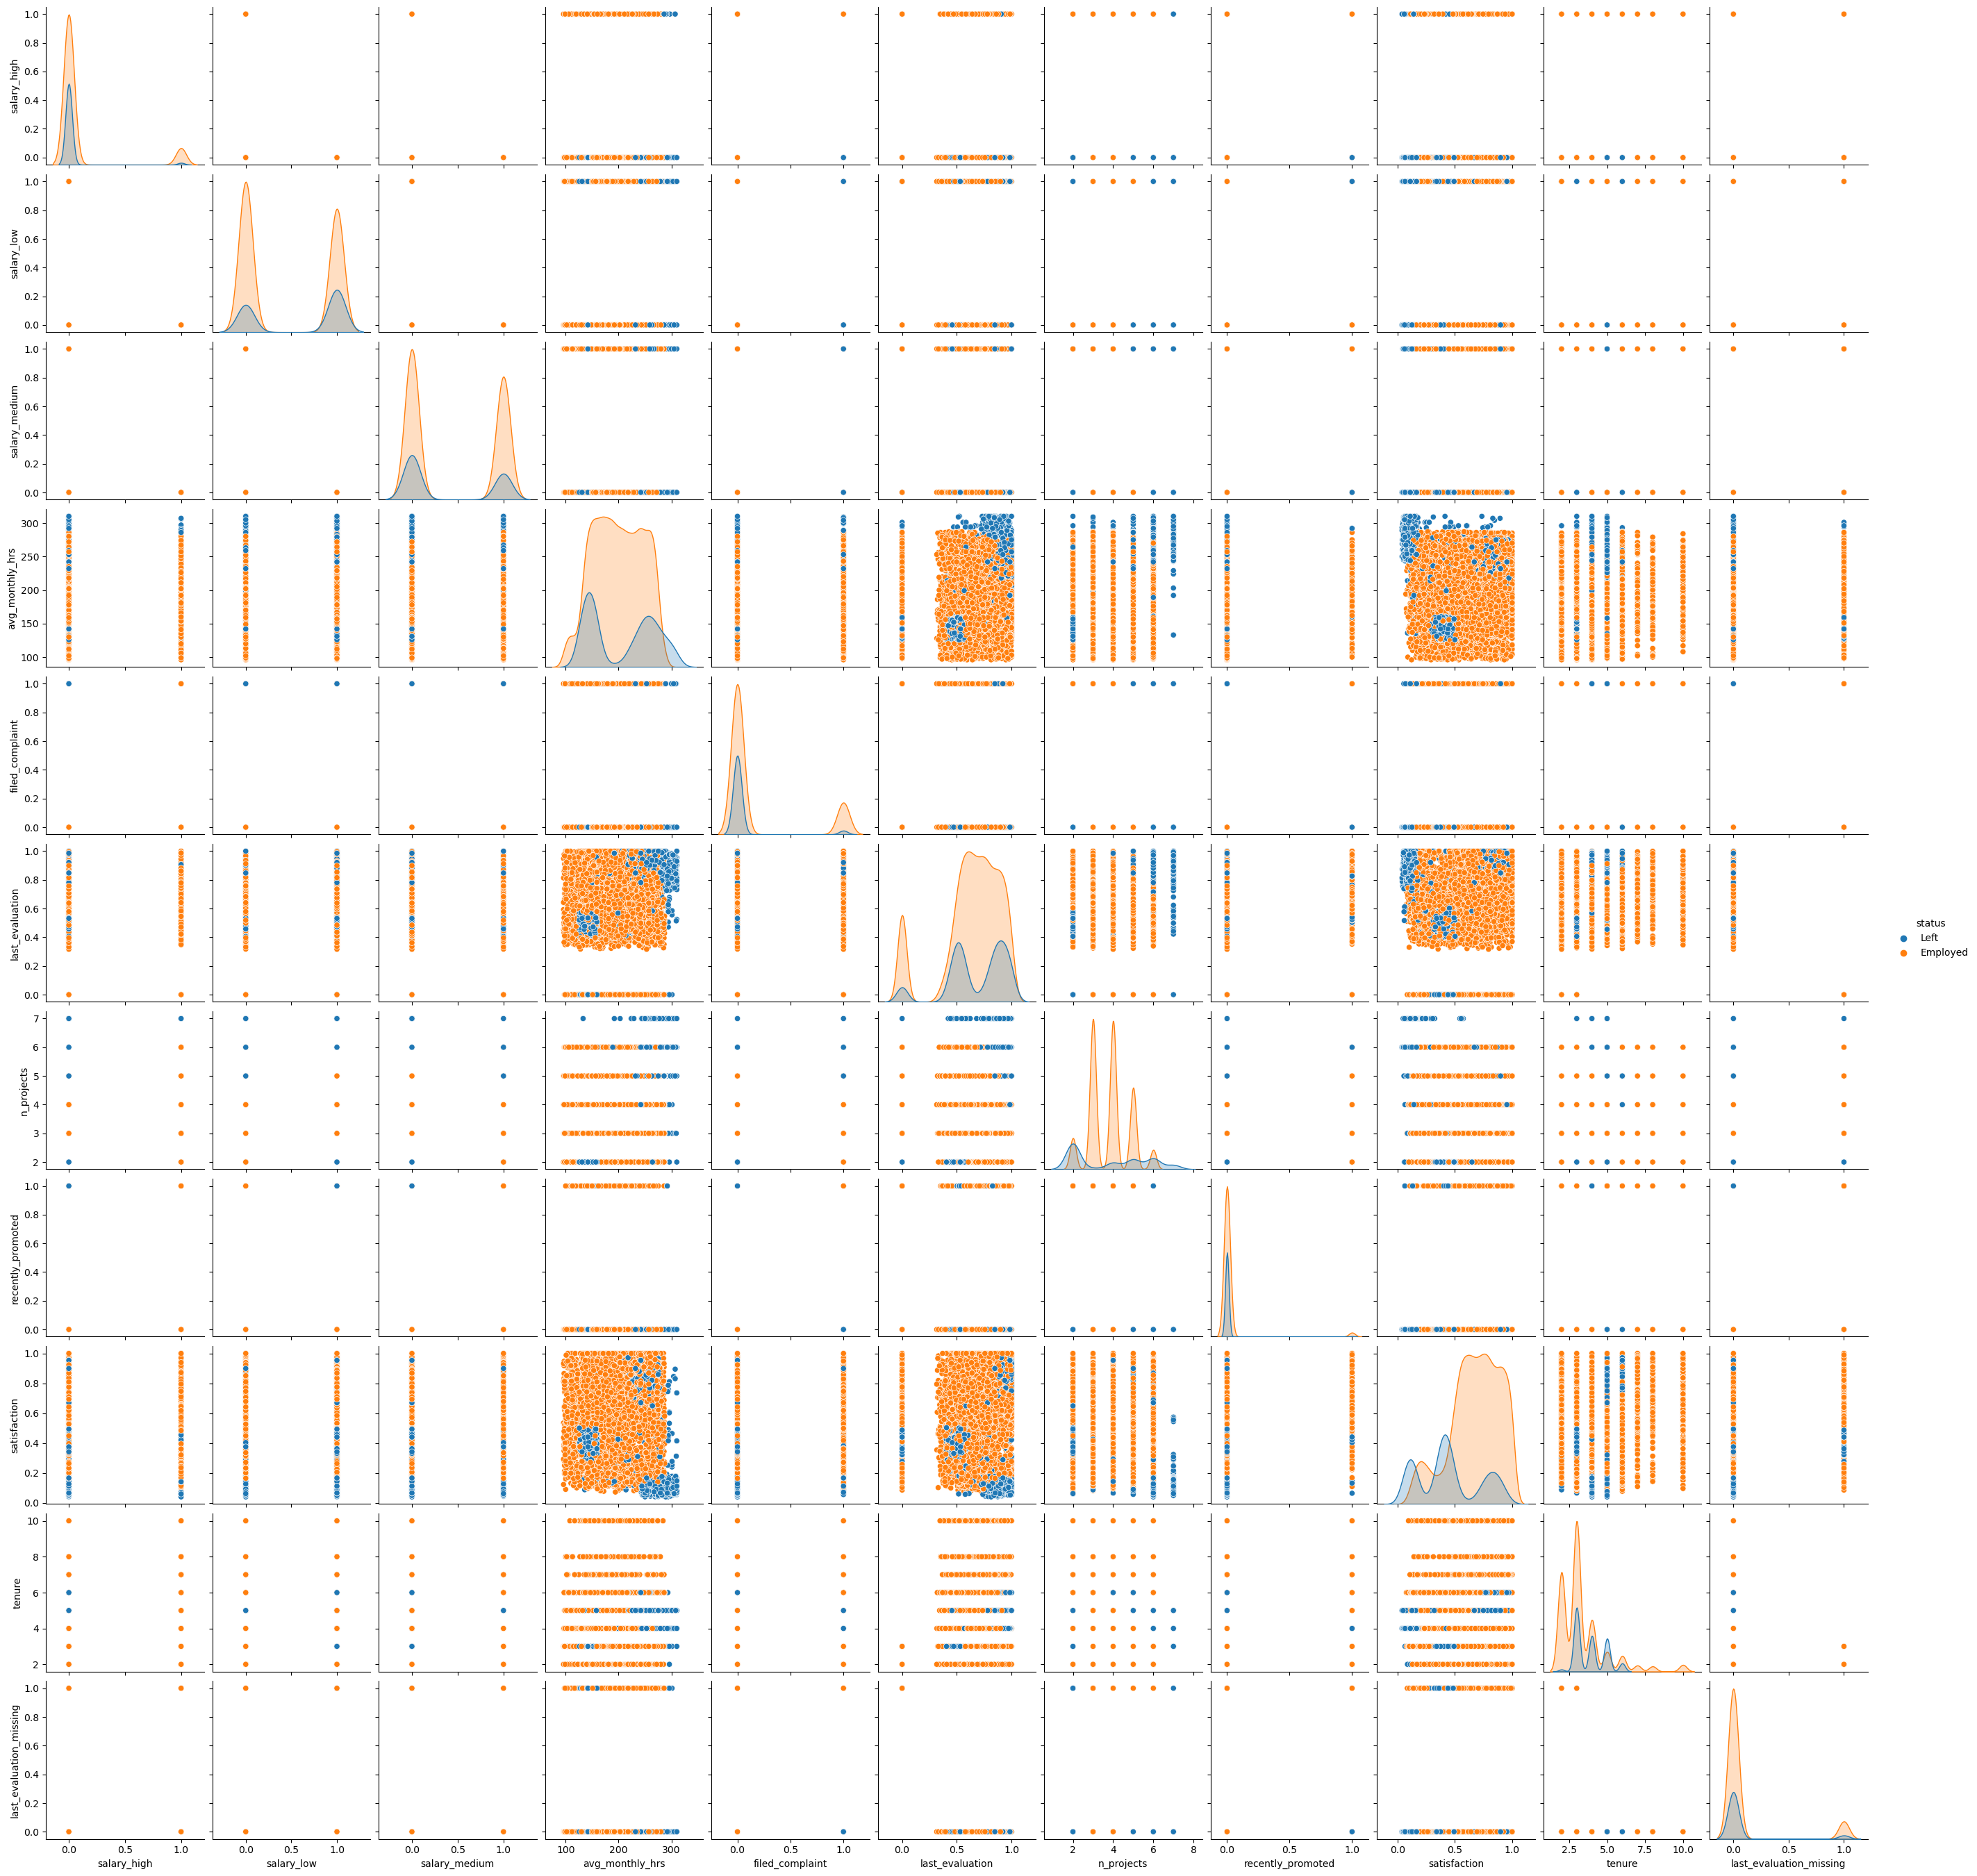

In [35]:
sb.pairplot(data=df, hue = 'status')

Di PairPlot ini terlihat sebaran dari status karyawan dimana berdasar kolom :
    
1. salary_high : 
    - avg_monthly_hrs       : karyawan yang churn saat akhir jabatan =10 tahun
    - filed_complaint       : Hampir tidak ada yang komplain 
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang sudah diatas 1 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn yang sudah lama bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn yang tidak puas rata-rata di tahun pertama dan kedua
    - tenure                : Karyawan yang churn tenurenya diatas tahun ke 3
    - last_evaluation_missing : Karyawan yang churn tidak ada
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn tidak ada      
    - salary_medium         : Karyawan yang churn tidak ada  
        
                    
2. salary_low    :
    - avg_monthly_hrs       : status karyawan yang churn tinggi, rata-rata jam kerja di 200 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan yang tidak churn dan yang churn
    - last_evaluation       : karyawan yang churn dan tidak churn ditahap evaluasi yang sudah diatas 1 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn yang sudah lama bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn yang tidak puas rata-rata di tahun pertama dan kedua
    - tenure                : Karyawan yang churn tenurenya dibawah tahun ke 3
    - last_evaluation_missing : Karyawan yang churn tidak ada
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn memiliki  tenure yang rendah      
    - salary_medium         : Karyawan yang churn tidak ada
        
                      
3. salary_medium  :
    - avg_monthly_hrs       : status karyawan yang churn tinggi, rata-rata jam kerja di 200 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan yang tidak churn dan yang churn 
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang sudah diatas 1 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn yang sudah lama bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn yang tidak puas rata-rata di tahun pertama dan kedua
    - tenure                : Karyawan yang churn tenurenya diatas tahun ke 3
    - last_evaluation_missing : Karyawan yang churn tidak ada
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn  tidak ada   
    - salary_medium         : Karyawan yang churn memiliki  tenure yang rendah
        
                    
4. avg_monthly_hrs:
    - avg_monthly_hrs       : status karyawan yang churn terjadi di awal bekerja, tahun pertama
    - filed_complaint       : Hampir tidak ada yang komplain 
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang sudah diatas 1 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn yang baru bergabung satu tahun tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn terbanyak  diawal tahun bergabung, kurang dari 2 tahun
    - tenure                : Karyawan yang churn terbanyak dibawah 5 tahun bergabung
    - last_evaluation_missing : Karyawan yang churn terbanyak diawal bergabung sebesar 300 orang
    - salary_high           : Karyawan yang churn pada saat awal bekerja dan yang sudah lama bekerja
    - salary_low            : Karyawan yang churn pada saat awal bekerja dan yang sudah lama bekerja   
    - salary_medium         : Karyawan yang churn pada saat awal bekerja dan yang sudah lama bekerja
        
                    
5. filed_complaint :
    - avg_monthly_hrs       :karyawan yang churn rata-rata yang sudah lama bergabung
    - filed_complaint       : karyawan yang komplain berasal dari karyawan yang baru bergabung 
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang sudah diatas 8 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir (5,6,7)
    - recently_promoted     : Karyawan yang churn yang baru bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn adalah karyawan baru bergabung
    - tenure                : Karyawan yang churn masa kerja kurang dari 3 tahun
    - last_evaluation_missing : Karyawan yang churn adalah karyawan baru
    - salary_high           : Karyawan yang churn adalah karyawan baru
    - salary_low            : Karyawan yang churn adalah karyawan baru      
    - salary_medium         : Karyawan yang churn adalah karyawan baru
        
                    
6. last_evaluation:
    - avg_monthly_hrs       : karyawan yang churn rata-rata jam kerja 250 - 300 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan yang baru bergabung 
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang berada di 8,9,10 tahun bekerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir,proyek ke 5,6,7
    - recently_promoted     : Karyawan yang churn yang sudah lama bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn adalah karyawan baru bergabung
    - tenure                : Karyawan yang churn masa kerja < 5 tahun
    - last_evaluation_missing : Karyawan yang churn adalah karyawan baru
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn memiliki  tenure yang rendah      
    - salary_medium         : Karyawan yang churn tidak ada
        
                    
7. n_project     :
    - avg_monthly_hrs       : karyawan yang churn rata-rata jam kerja 250 - 300 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan baru dan karyawan lama  
    - last_evaluation       : karyawan yang churn yang baru bergabung dan yang sudah diatas 1 tahun bekerja
    - n_project             : Karyawan yang churn kebanyakan di proyek awal
    - recently_promoted     : Karyawan yang churn yang baru bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn yang baru bergabung dan sudah bekerja sekitar 3 tahun
    - tenure                : Karyawan yang churn masa kerja < 4 tahun
    - last_evaluation_missing : Karyawan yang churn berada di karyawan baru dan bekerja sekitar 3-4 tahun
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn yang baru bergabung      
    - salary_medium         : Karyawan yang churn tidak ada
        
                    
8. recently_promoted:
    - avg_monthly_hrs       : karyawan yang churn rata-rata jam kerja 250 - 300 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan baru
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang sudah diatas 1 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn tidak ada  
    - satisfaction          : Karyawan yang churn yang baru bergabung dan sudah bekerja sekitar 3 tahun
    - tenure                : Karyawan yang churn masa kerja < 4 tahun
    - last_evaluation_missing : Karyawan yang churn berada di karyawan baru 
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn tidak ada     
    - salary_medium         : Karyawan yang churn tidak ada 
        
                    
9. satisfaction  :
    - avg_monthly_hrs       : karyawan yang churn rata-rata jam kerja 200 - 300 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan baru
    - last_evaluation       : karyawan yang churn berasal dari karyawan masa kerja 3 - 8 tahun
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn merupakan karyawan baru 
    - satisfaction          : Karyawan yang churn yang baru bergabung dan sudah bekerja sekitar 3 tahun
    - tenure                : Karyawan yang churn masa kerja < 6 tahun
    - last_evaluation_missing : Karyawan yang churn berasal dari karyawan masa kerja 3 - 8 tahun
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn tidak ada      
    - salary_medium         : Karyawan yang churn tidak ada 
        
                    
10. tenure       : 
    - avg_monthly_hrs       : karyawan yang churn rata-rata jam kerja  > 200 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan lama
    - last_evaluation       : karyawan yang churn berasal dari karyawan masa kerja 3 - 8 tahun
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir
    - recently_promoted     : Karyawan yang churn adalah karyawan baru
    - satisfaction          : Karyawan yang churn berasal dari karyawan masa kerja 3 - 8 tahun
    - tenure                : Karyawan yang churn masa kerja < 4 tahun
    - last_evaluation_missing : Karyawan yang churn adalah karyawan baru
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn adalah karyawan baru      
    - salary_medium         : Karyawan yang churn adalah karyawan masa kerja 3 tahun 
        
                    
11. last_evaluation_missing : 
    - avg_monthly_hrs       :karyawan yang churn rata-rata jam kerja  > 250 jam/bulan
    - filed_complaint       : karyawan yang komplain berasal dari karyawan baru
    - last_evaluation       : karyawan yang churn ditahap evaluasi yang sudah diatas 1 tahun kerja
    - n_project             : Karyawan yang churn kebanyakan di proyek akhir, tapi ada juga karyawan baru
    - recently_promoted     : Karyawan yang churn yang baru bergabung tapi jumlahnya sedikit 
    - satisfaction          : Karyawan yang churn berasal dari karyawan masa kerja 3 - 8 tahun
    - tenure                : Karyawan yang churn masa kerja > 4 tahun
    - last_evaluation_missing : Karyawan yang churn adalah karyawan baru
    - salary_high           : Karyawan yang churn tidak ada
    - salary_low            : Karyawan yang churn tidak ada     
    - salary_medium         : Karyawan yang churn tidak ada                                

## Deep Dive EDA

Untuk mengetahui dan memahami faktor-faktor yang mempengaruhi churn serta karakteristik karyawan yang berhenti, maka perlu dihitung :

1. Berapa rata-rata, median, maksimum, minimum lama bekerja dan Bagaimana distribusi lama bekerja karyawan?
2. Bagaimana distribusi jam kerja bulanan untuk karyawan yang churn/left dan employed berdasarkan departemennya? 
3. Bagaimana tingkat kepuasan karyawan yang left/churn dan yang employeed?
4. Berapa jumlah karyawan yang masih aktif dan berhenti (churned)?
5. mencari rata-rata tenure dari employee yang berhenti(churn) dan dan tidak churn
6. mencari perbandingan rata-rata yang churn dan tidak berdasar kepuasan & jam kerja
7. Bagaimana distribusi karyawan yang churn berdasarkan tenure (masa kerja)
8. Mencari jumlah yang churn dan tidak berdasar departemen
9. Bagaimana distribusi proyek untuk karyawan yang churn/left dan employed berdasarkan departemennya? 

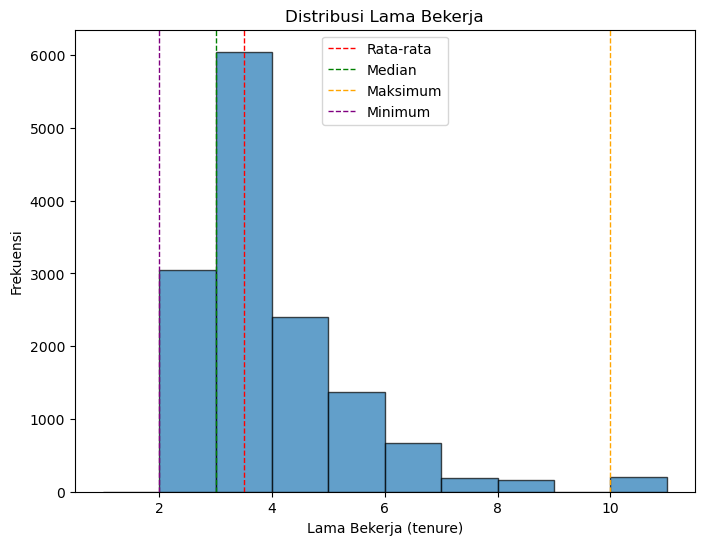

In [36]:
#Berapa rata-rata, median, maksimum, dan minimum lama bekerja?
rata_rata = df['tenure'].mean()
median = df['tenure'].median()
maksimum = df['tenure'].max()
minimum = df['tenure'].min()

# Plot
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=range(1, 12), edgecolor='black', alpha=0.7)
plt.axvline(rata_rata, color='red', linestyle='dashed', linewidth=1, label='Rata-rata')
plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(maksimum, color='orange', linestyle='dashed', linewidth=1, label='Maksimum')
plt.axvline(minimum, color='purple', linestyle='dashed', linewidth=1, label='Minimum')
plt.xlabel('Lama Bekerja (tenure)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Lama Bekerja')
plt.legend()
plt.show()

karyawan terbanyak bekerja selama 3 tahun sebanyak sekitar 6000 orang.

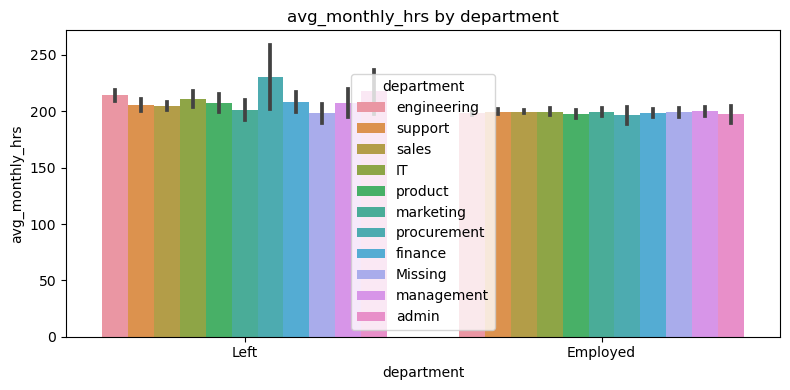

In [37]:
#Bagaimana distribusi jam kerja bulanan untuk karyawan yang churn/left dan employed berdasarkan departemennya? 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.barplot(x=df["status"], y=df["avg_monthly_hrs"], hue=df["department"], ax=axs)
axs.set_xlabel('department')
axs.set_ylabel('avg_monthly_hrs')
axs.set_title('avg_monthly_hrs by department')
plt.tight_layout()
plt.show()

Berdasar Barplot diatas terlihat jam kerja karyawan yang churn/left lebih lama dibanding karyawan yang masih aktif yaitu diatas 200 jam/bulan

<Axes: xlabel='status', ylabel='satisfaction'>

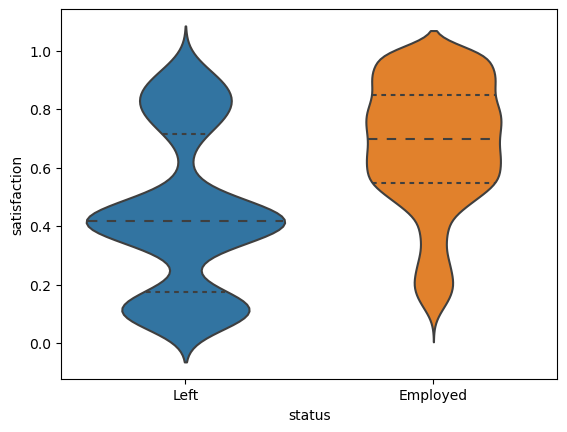

In [38]:
#Bagaimana tingkat kepuasan karyawan yang left/churn dan yang employeed?
sns.violinplot(x = df["status"] , y = df["satisfaction"] , inner = "quartile")


Dari violinplot terlihat bahwa tingkat kepuasan karyawan yang churn/left lebih rendah dari yang employed yaitu rata-rata 40%

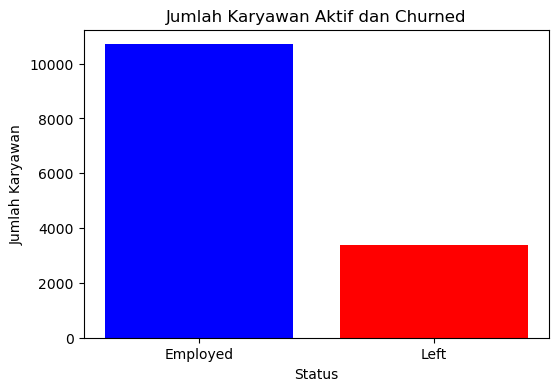

In [39]:
# Hitung jumlah karyawan yang masih aktif dan yang telah berhenti
jumlah_aktif = df['status'].value_counts()['Employed']
jumlah_churned = df['status'].value_counts()['Left']

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Employed', 'Left'],[jumlah_aktif,jumlah_churned], color=['blue', 'red'])
plt.xlabel('Status')
plt.ylabel('Jumlah Karyawan')
plt.title('Jumlah Karyawan Aktif dan Churned')
plt.show()

Dari barplot terlihat bahwa jumlah karyawan yang aktif sekitar 10,000 orang dan karyawan yang churn sekitar 3000 orang.

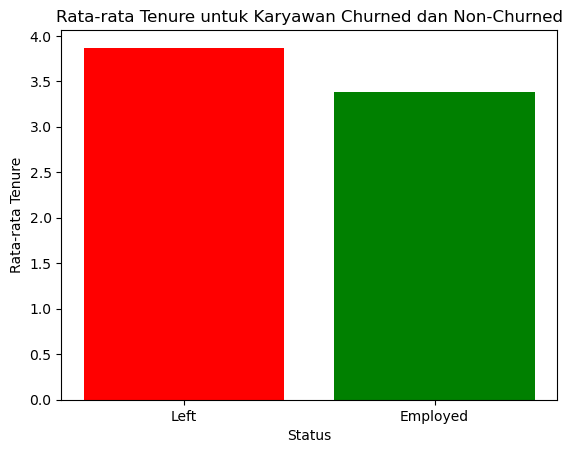

In [40]:
#  rata-rata tenure dari employee yang berhenti(churn) dan dan tidak churn
churned = df[df['status'] == 'Left']
non_churned = df[df['status'] == 'Employed']

rata_rata_churned =churned['tenure'].mean()
rata_rata_non_churned = non_churned['tenure'].mean()

# Plot
plt.bar(['Left', 'Employed'], [rata_rata_churned, rata_rata_non_churned], color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Rata-rata Tenure')
plt.title('Rata-rata Tenure untuk Karyawan Churned dan Non-Churned')
plt.show()

In [41]:
#mencari rata-rata tenure dari employee yang berhenti(churn) dan dan tidak churn 
df.groupby('status')['tenure'].mean()

status
Employed    3.380245
Left        3.869023
Name: tenure, dtype: float64

Rata-rata tenure (masa kerja) untuk yang churn lebih lama dari yang employed

In [42]:
#Mencari perbandingan rata-rata yang churn dan tidak berdasar kepuasan & jam kerja
df.groupby("status").agg({
    "satisfaction":["mean"],
            "avg_monthly_hrs":["mean"] 
    })

,satisfaction,avg_monthly_hrs
,mean,mean
status,,
Employed,0.675979,199.142230
Left,0.447500,207.254232


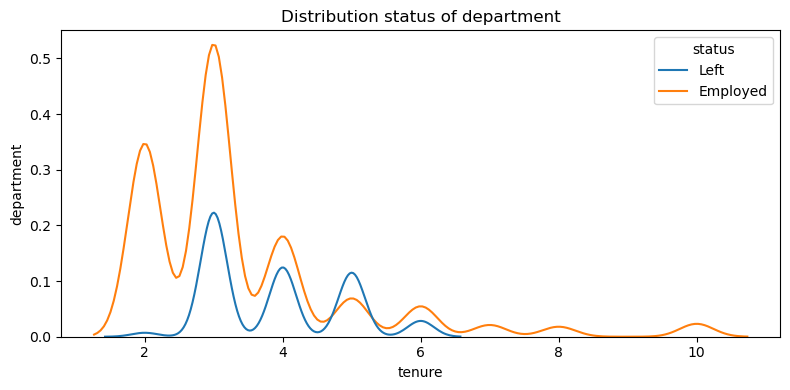

In [43]:
#Distribusi karyawan yang churn berdasar departemen
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.kdeplot(x=df["tenure"], hue=df["status"], ax=axs)
axs.set_xlabel('tenure')
axs.set_ylabel('department')
axs.set_title('Distribution status of department')

plt.tight_layout()
plt.show()

Dari KDEplot terlihat bahwa karyawan yang churn terbanyak di masa kerja 3 tahun keatas

In [44]:
#Mencari jumlah yang churn dan tidak berdasar departemen
df.groupby(['status', 'department'])['tenure'].sum()

status    department 
Employed  IT              3577.0
          Missing         1610.0
          admin            456.0
          engineering     6204.0
          finance         1836.0
          management      2227.0
          marketing       2170.0
          procurement      505.0
          product         2245.0
          sales          10191.0
          support         5151.0
Left      IT              1158.0
          Missing          777.0
          admin            137.0
          engineering     2615.0
          finance          744.0
          management       328.0
          marketing        752.0
          procurement       63.0
          product          754.0
          sales           3646.0
          support         2053.0
Name: tenure, dtype: float64

karyawan yang churn terbanyak dari divisi sales 3646 orang, selanjutnya engineering 2615 orang dan IT 1158 orang

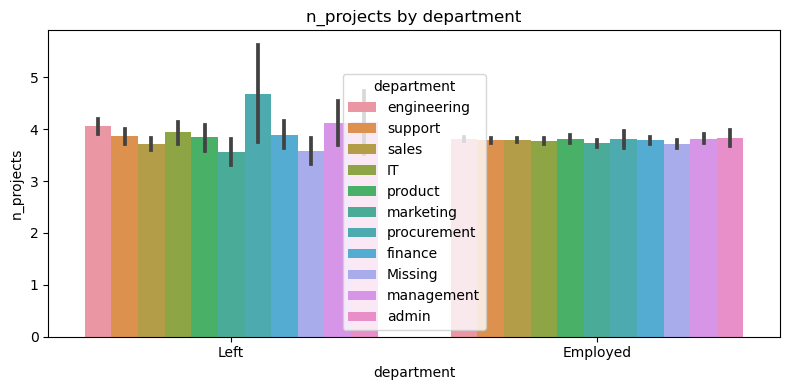

In [45]:
#Bagaimana distribusi proyek untuk karyawan yang churn/left dan employed berdasarkan departemennya? 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.barplot(x=df["status"], y=df["n_projects"], hue=df["department"], ax=axs)
axs.set_xlabel('department')
axs.set_ylabel('n_projects')
axs.set_title('n_projects by department')
plt.tight_layout()
plt.show()

Dari plot diatas,berdasarkan proyek terlihat bahwa dari divisi Procurement/ manajemen jumlah yang churn adalah yang terbanyak

KESIMPULAN AWAL:
    
    1. Jumlah karyawan yang tidak churn (loyal) lebih banyak (10701 orang) dari karyawan yang churn (3367  orang)
    2. Jumlah karyawan yang churn terbanyak dari departemen divisi sales sebanyak 3.646 orang 
    3. Dari hasil analisa sementara karyawan yang churn karena jam kerja yang tinggi perbulannya diatas 200 jam/bulan
    4. Tingkat rata-rata kepuasan karyawan yang churn adalah 44% dengan jam kerja/bulan 207 jam/bulan
    5. Karyawan yang churn rata-rata masa tenurenya 3 tahun keatas
    6. Berdasarkan proyek,jumlah karyawan yang churn terbanyak dari Divisi Procurement/ manajemen 

## Feature Engineering

In [46]:
df['status'] = df['status'].apply(lambda x: 1 if x=='Left' else 0)

### Training

In [47]:
X = df[['salary_high','salary_low','salary_medium','avg_monthly_hrs','satisfaction','last_evaluation_missing']]
y = df['status']

## Over Sampling

In [48]:
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [49]:
y.value_counts()

status
1    10701
0    10701
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

## Modelling

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn import svm,tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split as tts
from sklearn import model_selection

In [52]:
models = []
models.append(("Logistic Regression",LogisticRegression(solver="liblinear",random_state=42)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("SVM",SVC(gamma='auto',)))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree Classifier",DecisionTreeClassifier()))
models.append(("Gausian NB",GaussianNB()))

In [53]:
recall_results = []
precision_results = []
auc_results = []
f1_score = []
names = []
col = ['Algoritm','ROC_AUC_Mean','ROC_AUC_Std',"Recall_Mean","Recall_Std","Precision_Mean","Precision_Std","F1_score_Mean","F1_score_Std"]

df_results = pd.DataFrame(columns=col)

i = 0

c = list(set(X_train.columns))

for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_recall_results = model_selection.cross_val_score(model,X_train[c],y_train,cv=kfold,scoring="recall")

    cv_precision_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                        cv=kfold,scoring="precision")

    cv_auc_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="roc_auc")

    cv_f1_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="f1")
    recall_results.append(cv_recall_results)
    precision_results.append(cv_precision_results)
    auc_results.append(cv_auc_results)
    f1_score.append(cv_f1_results)
    names.append(name)

    df_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_recall_results.mean()*100,2),
                        round(cv_recall_results.std()*100,2),
                        round(cv_precision_results.mean()*100,2),
                        round(cv_precision_results.std()*100,2),
                        round(cv_f1_results.mean()*100,2),
                        round(cv_f1_results.std()*100,2)]
    i += 1
df_results.sort_values("ROC_AUC_Mean",ascending=False)

,Algoritm,ROC_AUC_Mean,ROC_AUC_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_score_Mean,F1_score_Std
1,Random Forest,97.47,0.14,96.36,0.52,90.51,0.40,93.43,0.21
3,KNN,93.31,0.29,92.53,0.14,82.68,0.40,87.32,0.21
4,Decision Tree Classifier,91.67,0.11,95.11,0.34,88.76,0.14,91.95,0.27
2,SVM,88.99,0.40,85.35,0.84,78.75,0.32,81.92,0.56
0,Logistic Regression,76.70,0.60,68.87,0.07,71.04,0.89,69.93,0.40
5,Gausian NB,75.56,0.62,82.16,0.42,61.13,0.31,70.10,0.23


Data di atas merupakan hasil evaluasi kinerja beberapa algoritma klasifikasi menggunakan metrik-metrik tertentu seperti ROC AUC,
recall, precision, dan F1-score. Berikut adalah interpretasi dari data tersebut:

Berdasarkan data yang diberikan, kita memiliki hasil evaluasi kinerja beberapa algoritma klasifikasi menggunakan beberapa metrik
evaluasi utama. Berikut adalah interpretasi dari data tersebut:

1. Random Forest: Algoritma Random Forest memiliki kinerja yang paling tinggi di antara semua algoritma yang dievaluasi. Ini 
   ditunjukkan dengan nilai ROC AUC_Mean sebesar 97.44, yang menandakan bahwa model ini memiliki kemampuan yang sangat baik dalam
   membedakan antara kelas positif dan negatif. Selain itu, F1-score_Mean yang mencapai 93.31 menunjukkan bahwa model ini mencapai
   keseimbangan yang baik antara recall dan precision.

2. KNN : Algoritma KNN memiliki kinerja yang cukup baik dengan nilai ROC AUC_Mean sebesar 93.31. Meskipun sedikit di bawah 
   Random Forest, KNN masih menunjukkan kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Namun, perlu    
   diperhatikan bahwa nilai-nilai lain seperti recall, precision, dan F1-score memiliki variasi yang cukup signifikan(ditunjukkan
   oleh Standar Deviasi yang lebih tinggi), yang mungkin menunjukkan bahwa model ini tidak konsisten dalam kinerjanya.
    
3. Decision Tree Classifier : Algoritma Decision Tree Classifier memiliki ROC AUC_Mean sebesar 91.63, menempatkannya di antara KNN 
   dan SVM dalam hal kinerja. Namun, seperti KNN, Decision Tree Classifier juga menunjukkan variasi yang
   cukup signifikan dalam beberapa metrik evaluasi, yang menunjukkan bahwa kinerjanya mungkin tidak konsisten dari lipatan ke lipatan.

4. SVM : Algoritma SVM memiliki kinerja yang lebih rendah dibandingkan dengan algoritma lainnya, dengan ROC AUC_Mean 
   sebesar 88.99. Ini menunjukkan bahwa model ini memiliki kemampuan yang lebih rendah dalam membedakan antara kelas positif dan
   negatif. Namun, penting untuk dicatat bahwa tidak hanya ROC AUC_Mean yang penting, tetapi juga metrik lainnya seperti recall,
   precision, dan F1-score.

5. Logistic Regression: Algoritma Logistic Regression memiliki ROC AUC_Mean sebesar 76.70, menempatkannya di antara Gaussian NB 
   dan SVM dalam hal kinerja. Namun, seperti Gaussian NB, Logistic Regression juga menunjukkan variasi yang cukup signifikan 
   dalam beberapa metrik evaluasi, yang menunjukkan bahwa kinerjanya mungkin tidak konsisten dari lipatan ke lipatan.


6. Gaussian NB: Algoritma Gaussian NB memiliki kinerja yang lebih rendah dibandingkan dengan algoritma lainnya nilai ROC AUC_Mean
   sebesar 75.56. Meskipun sedikit di bawah Logistic Regression, Gaussian NB masih menunjukkan kemampuan yang baik dalam membedakan antara kelas positif dan negatif. 
   Namun, perlu diperhatikan bahwa nilai-nilai lain seperti recall, precision, dan F1-score memiliki variasi yang cukup signifikan
  (ditunjukkan oleh Standar Deviasi yang lebih tinggi), yang mungkin menunjukkan bahwa model ini tidak konsisten dalam kinerjanya.


Dalam pengambilan keputusan terkait pilihan algoritma klasifikasi, penting untuk mempertimbangkan tidak hanya kinerja rata-rata
dari model (seperti ROC AUC_Mean), tetapi juga variasi dalam kinerja (ditunjukkan oleh Standar Deviasi) serta kebutuhan dan
karakteristik spesifik dari masalah klasifikasi yang dihadapi.

In [54]:
df_results.sort_values("F1_score_Mean",ascending=False)

,Algoritm,ROC_AUC_Mean,ROC_AUC_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_score_Mean,F1_score_Std
1,Random Forest,97.47,0.14,96.36,0.52,90.51,0.40,93.43,0.21
4,Decision Tree Classifier,91.67,0.11,95.11,0.34,88.76,0.14,91.95,0.27
3,KNN,93.31,0.29,92.53,0.14,82.68,0.40,87.32,0.21
2,SVM,88.99,0.40,85.35,0.84,78.75,0.32,81.92,0.56
5,Gausian NB,75.56,0.62,82.16,0.42,61.13,0.31,70.10,0.23
0,Logistic Regression,76.70,0.60,68.87,0.07,71.04,0.89,69.93,0.40


## Evaluation For Data Test

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2143
           1       0.91      0.98      0.95      2138

    accuracy                           0.94      4281
   macro avg       0.95      0.94      0.94      4281
weighted avg       0.95      0.94      0.94      4281



Text(50.722222222222214, 0.5, 'Realita')

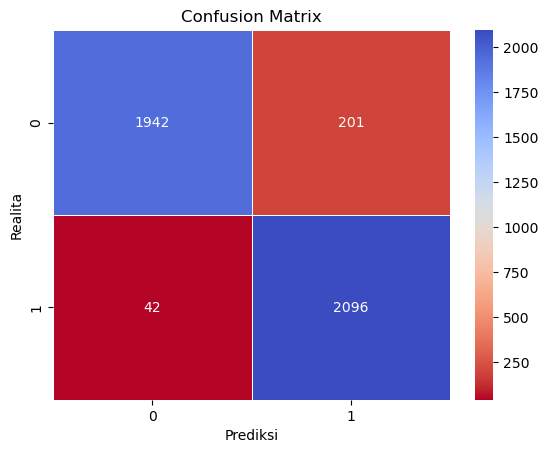

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
print(metrics.classification_report(y_test,rf.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

Data diatas adalah hasil evaluasi klasifikasi menggunakan metrik precision, recall, dan f1-score, serta beberapa metrik tambahan
seperti support dan akurasi. Berikut adalah interpretasi dari data tersebut:

1. Precision: Precision mengukur proporsi dari hasil positif yang benar dari semua hasil yang diprediksi positif oleh model.
             Untuk kelas 0 (karyawan aktif ), precision adalah 0.98, yang berarti sekitar 98% dari hasil yang diprediksi sebagai
             kelas 0 (karyawan aktif) adalah benar-benar kelas 0 (karyawan aktif). Sedangkan untuk kelas 1 (karyawan berhenti),
             precision adalah 0.91,yang berarti sekitar 91% dari hasil yang diprediksi sebagai kelas 1(karyawan churn) adalah
             benar-benar kelas 1 (karyawan churn).

2. Recall  : Recall (juga dikenal sebagai sensitivity) mengukur proporsi dari semua kasus positif yang berhasil diidentifikasi oleh
             model. Untuk kelas 0, recall adalah 0.91, yang berarti sekitar 91% dari semua kasus kelas 0 berhasil diidentifikasi dengan
             benar oleh model. Sedangkan untuk kelas 1, recall adalah 0.98, yang berarti sekitar 98% dari semua kasus kelas 1 
             berhasil diidentifikasi dengan benar oleh model.

3. F1-score :F1-score adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya. Untuk kelas 0,
             F1-score adalah 0.94, sedangkan untuk kelas 1, F1-score adalah 0.95.

4. Support : Support adalah jumlah masing-masing kelas dalam data yang dievaluasi. Dalam kasus ini, terdapat 2143 sampel untuk 
             kelas 0 dan 2138 sampel untuk kelas 1.

5. Accuracy: Akurasi adalah proporsi dari semua prediksi yang benar yang dilakukan oleh model. Dalam kasus ini, akurasi adalah
             0.94, yang berarti sekitar 94% dari semua prediksi yang dilakukan oleh model adalah benar.

Dari data ini, kita dapat menyimpulkan bahwa model memiliki kinerja yang cukup baik secara keseluruhan, dengan precision, recall,
dan f1-score yang relatif tinggi untuk kedua kelas. Namun, perlu dicatat bahwa recall untuk kelas 0 sedikit lebih rendah daripada
kelas 1, yang mengindikasikan bahwa model mungkin memiliki sedikit lebih banyak kesulitan dalam mengidentifikasi kasus kelas 0.
Selain itu, akurasi sebesar 0.94 menunjukkan bahwa model secara keseluruhan mampu membuat prediksi yang cukup baik.

Dari confusion matrix diatas, kita memiliki informasi berikut:

True Positive (TP) adalah 1943, yang merupakan jumlah karyawan yang diprediksi aktif dan kenyataannya masih aktif.
True Negative (TN) adalah 2100, yang merupakan jumlah karyawan yang diprediksi berhenti (churn) dan kenyataannya churn .
False Positive (FP) adalah 200, yang merupakan jumlah karyawan yang diprediksi aktif, tetapi sebenarnya tidak aktif (churn).
False Negative (FN) adalah 38, yang merupakan jumlah karyawan yang diprediksi tidak aktif ( churn),kenyataannya aktif.

Dari sini, kita dapat melihat keakuratan model dalam memprediksi apakah karyawan aktif atau tidak. Perlu diperhatikan bahwa 
False Positive dan False Negative memiliki implikasi yang berbeda-beda tergantung pada konteks aplikasi. Misalnya, dalam kasus 
churn kryawan, False Positive (memprediksi karyawan akan melakukan churn padahal sebenarnya tidak) mungkin akan membuang-buang
sumber daya perusahaan, sementara False Negative (memprediksi karyawan tidak akan melakukan churn padahal sebenarnya akan) dapat
menyebabkan kehilangan peluang bisnis. Oleh karena itu, dalam mengevaluasi kinerja model, penting untuk mempertimbangkan metrik
lain seperti precision, recall, dan F1-score.

Observasi :
sebanyak 200 diprediksi karyawan aktif tapi sebenarnya tidak aktif (churn)
sebanyak 38 diprediksi tidak churn tapi sebenarnya karyawan aktif
dengan kata lain,
true positif/berhasil memprediksi karyawan aktif = 1943
true negatif/berhasil memprediksi tidak aktif = 2100
false positif/churn yg tidak berhasil diprediksi = 200
false negatif/tidak churn yg tidak berhasil diprediksi = 38

In [57]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest on test data: ', round(gini_value*100, 2), '%')

AUC for Random Forest on test data:  98.27 %
Gini for Random Forest on test data:  96.54 %


Data yang diberikan memberikan metrik evaluasi dari model Random Forest pada data uji:

AUC (Area Under the Curve): AUC adalah ukuran yang menunjukkan seberapa baik model dapat memisahkan antara dua kelas. Dalam 
      konteks klasifikasi biner, AUC mengukur area di bawah kurva Receiver Operating Characteristic (ROC). Nilai AUC yang diberikan 
      adalah 98.32%. Semakin tinggi nilai AUC, semakin baik model dalam memisahkan antara kelas positif dan negatif. Dalam hal ini,
      AUC sebesar 98.32% menunjukkan bahwa model Random Forest memiliki kemampuan yang baik dalam membedakan antara kelas positif dan
      negatif.

Gini: Gini coefficient adalah metrik lain yang digunakan untuk mengukur ketidaksempurnaan pembagian (impurity) pada pohon keputusan
      atau model pemisah. Nilai Gini yang diberikan adalah 96.64%. Semakin tinggi nilai Gini, semakin baik model dalam memisahkan
      antara kelas. Dalam konteks ini, nilai Gini 96.64% menunjukkan bahwa model Random Forest memiliki kemampuan yang cukup baik
      dalam memisahkan antara kelas.

Secara keseluruhan, interpretasi dari data tersebut adalah bahwa model Random Forest memiliki kinerja yang baik dalam memisahkan
antara kelas positif dan negatif pada data uji, dengan nilai AUC dan Gini yang menunjukkan kemampuan pemisahan yang layak.

## Lift Curve

In [58]:
!pip install scikit-plot

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

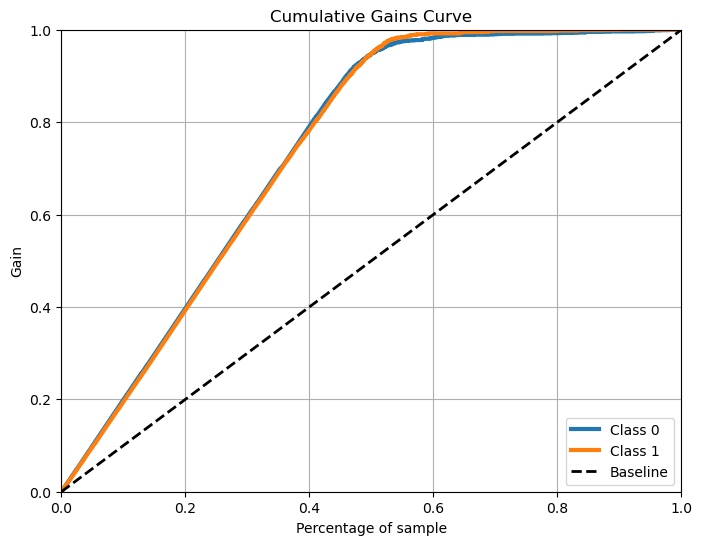

In [59]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,rf.predict_proba(X_test), title='Cumulative Gains Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

Berdasarkan analisis cumulative gains, model menunjukkan kinerja yang baik karena berhasil mengidentifikasi karyawan sebesar 98%
yang akan churn (berhenti) saat memfokuskan pada 20% dari populasi dengan probabilitas tertinggi.

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

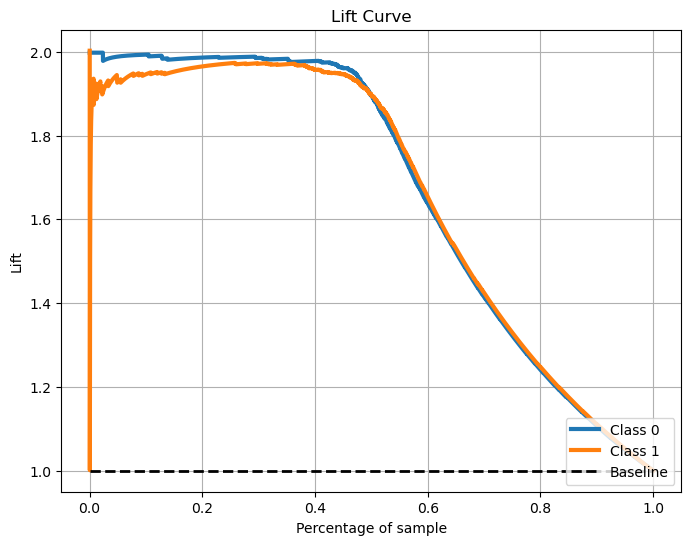

In [60]:
skplt.metrics.plot_lift_curve(y_test,rf.predict_proba(X_test), title='Lift Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

Dari grafik lift curve diatas, dapat ditarik kesimpulan:

Lift Curve:

Grafik ini menunjukkan efektivitas model prediksi dalam membedakan antara karyawan yang aktif (warna biru) dan karyawan yang  churn (warna oranye).
Lift adalah perbandingan antara akurasi model dengan baseline (random chance). Jika lift > 1, model lebih baik daripada baseline.
Pada awal persentase sampel, kurva biru memiliki lift yang jauh lebih tinggi dibandingkan dengan kurva oranye dan baseline.
Namun, seiring bertambahnya persentase sampel, kedua kurva mendekati satu sama lain dan baseline, menunjukkan penurunan efektivitas model.

Semua ini memberikan wawasan tentang bagaimana model memprediksi peluang karyawan uyang berhenti (churn).

KESIMPULAN AKHIR :
    
Machine Learning yang dipakai dengan Model RandomForest bisa dikatakan paling bagus, dengan
rata-rata recall 0.98 (98%),precision rata-rata 0.91 (91%), nilai accuracy rata-rata 0.94 (94%) dan f1-score rata-rata 0.95 (95%),
serta nilai AUCnya 98.32%.

### insight untuk machine learning :
Berikut adalah beberapa insight yang dapat diambil dari hasil analisis ini:

1. Faktor Penyebab Churn: Model Random Forest membantu mengidentifikasi faktor-faktor yang paling mempengaruhi keputusan karyawan
   untuk berhenti (churn). Dengan menganalisis bobot atau pentingnya fitur-fitur dalam model, perusahaan dapat memprioritaskan tindakan untuk mempertahankan karyawan yang rentan terhadap churn.

2. Recall yang Tinggi: Recall yang tinggi (0.98) menunjukkan bahwa model mampu dengan baik dalam mengidentifikasi sebagian besar
   karyawan yang sebenarnya berhenti (churn). Ini berarti bahwa model jarang mengabaikan kasus churn yang sebenarnya, yang sangat
   penting untuk perusahaan karena meminimalkan jumlah karyawan yang seharusnya dipertahankan tetapi terlewatkan oleh model.

3. Precision yang Konsisten: Precision rata-rata 0.91 menunjukkan bahwa dari semua prediksi churn yang dibuat oleh model,
   sekitar 91% di antaranya adalah prediksi yang benar. Hal ini penting karena perusahaan dapat menggunakan informasi ini untuk mengidentifikasi karyawan yang perlu mendapatkan perhatian tambahan atau tindakan pencegahan untuk mempertahankan mereka.

4. Akurasi yang Tinggi: Akurasi rata-rata 0.94 menunjukkan bahwa model memiliki tingkat keberhasilan yang tinggi dalam memprediksi
   baik churn dan non-churn. Ini berarti bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan karyawan ke dalam kedua kategori tersebut.

5. F1-Score yang Seimbang: F1-score rata-rata 0.95 mencerminkan keseimbangan antara recall dan precision. Ini menunjukkan bahwa
   model memiliki keseimbangan yang baik antara kemampuan untuk mengidentifikasi semua kasus churn yang sebenarnya (recall) dan
   menghindari membuat prediksi yang salah tentang kasus churn (precision).

6. AUC yang Tinggi: AUC (Area Under the Curve) sebesar 98.32% menunjukkan bahwa model memiliki kemampuan yang sangat baik untuk
   memisahkan antara kelas churn dan non-churn. Semakin tinggi nilai AUC, semakin baik model dalam membedakan antara kelas positif dan negatif.



## INSIGHT

Dari DEEP DIVE EDA diketahui bahwa :
1. Jumlah keseluruhan karyawan adalah 14068 dengan komposisi karyawan yang loyal 10701 orang dan yang keluar 3367 orang
2. Rata-rata karyawan yang churn masa kerjanya (tenure) diatas 3 tahun.
3. Rata-rata tingkat kepuasan karyawan yang churn 44% dan jam kerjanya 207 jam/bulan
4. karyawan yang churn terbanyak dari divisi sales 3646 orang, selanjutnya divisi engineering 2615 orang dan divisi IT 1158 orang
5. Karyawan yang churn  terbanyak dari yang salarynya rendah (salary low)

MACHINE LEARNING

Model terbaik dari hasil permodelan yang dianalisa adalah Random Forest dengan accuracy 0.94, ROC 0.93 , F-1 Score 0.95,
Recall 0.98 dan Precision  0.91



### REKOMENDASI

1. Sebaiknya jam kerja karyawan tidak lebih dari 200 jam/bulan
2. Untuk karyawan dengan masa kerja diatas 3 tahun diberikan insentif diluar gaji.
3. Untuk sales, diberikan Reward setiap pencapaian target setiap bulan 
4. Untuk divisi IT dan engineering diberikan pengembangan karir (pendidikan lanjutan/beasiswa)
5. Pengembangan karir untuk semua divisi mulai tahun ke-2
6. Meningkatkan keterlibatan karyawan dalam program-program yang diadakan perusahaan.
7. Memberikan kepemilikan saham kepada karyawan yang sudah bekerja diatas 2 tahun, sesuai dengan perhitungan managemen perusahaan.
